In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/Facial_Expression/


/content/drive/MyDrive/Facial_Expression


In [ ]:
!ls

checkpoint  fer2013.bib  fer2013.csv


In [ ]:
import os
import numpy as np
import tensorflow as tf
from matplotlib import pyplot

In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Facial_Expression/


/content/drive/MyDrive/Facial_Expression


In [ ]:
!ls


checkpoint  fer2013.bib  fer2013.csv


In [ ]:
df = pd.read_csv('fer2013.csv')
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1])

In [ ]:
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness', 4: 'sadness', 5: 'surprise', 6: 'neutral'}


In [ ]:
np.array(df.pixels.loc[0].split(' ')).reshape(48, 48)


array([['70', '80', '82', ..., '52', '43', '41'],
       ['65', '61', '58', ..., '56', '52', '44'],
       ['50', '43', '54', ..., '49', '56', '47'],
       ...,
       ['91', '65', '42', ..., '72', '56', '43'],
       ['77', '82', '79', ..., '105', '70', '46'],
       ['77', '72', '84', ..., '106', '109', '82']], dtype='<U3')

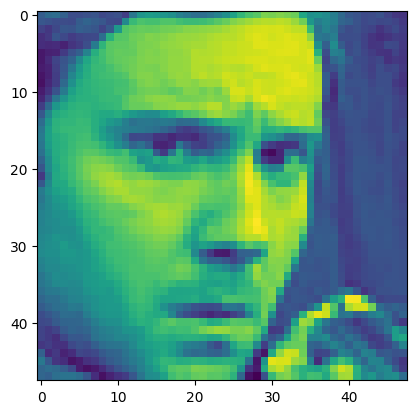

In [ ]:
pyplot.imshow(np.array(df.pixels.loc[0].split(' ')).reshape(48, 48)
.astype('float'))

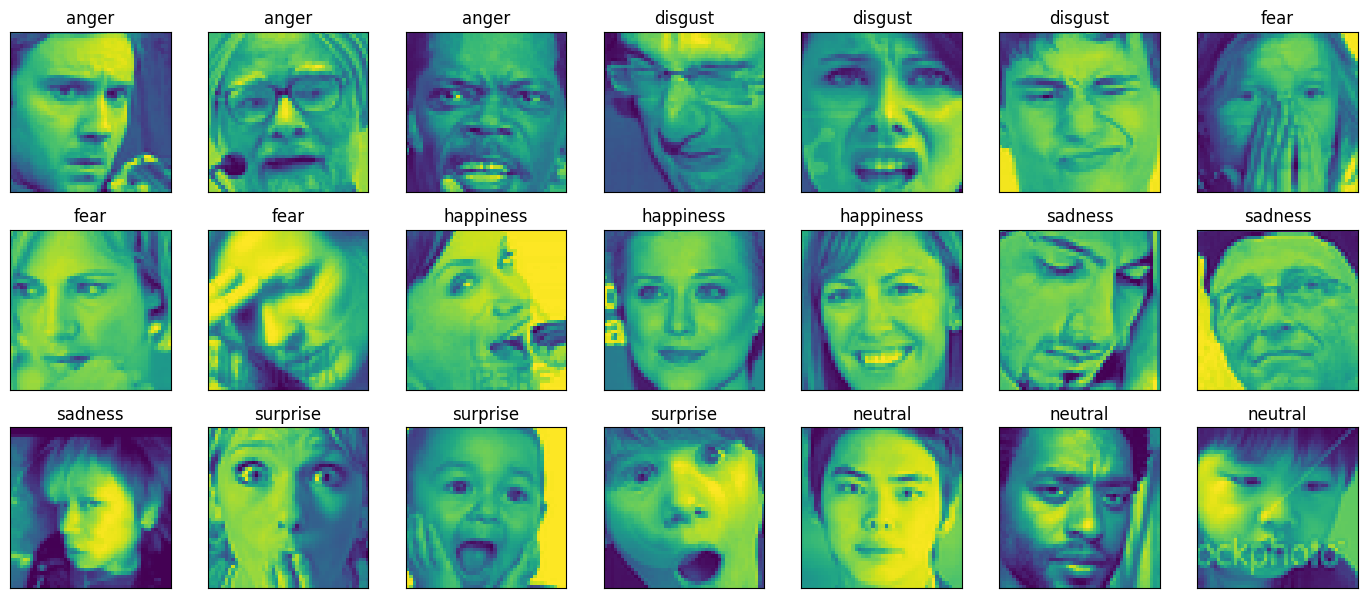

In [ ]:
fig = pyplot.figure(1, (14, 14))
k = 0
for label in sorted(df.emotion.unique()):
    for j in range(3):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = pyplot.subplot(7, 7, k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[label])
        pyplot.tight_layout()

In [ ]:
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))

In [ ]:
img_array = np.stack(img_array, axis=0)

In [ ]:
lables = df.emotion.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(img_array, lables, test_size=0.1)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((32298, 48, 48, 1), (32298,), (3589, 48, 48, 1), (3589,))

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
basemodel = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(1000,activation='relu'),
                                        tf.keras.layers.Dense(7,activation = 'softmax')
                                        ])

In [ ]:
basemodel.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'])

In [ ]:
import os
try:
  os.mkdir('checkpoint')
except:
  pass

In [ ]:
file_name = 'best_model.h5'
checkpoint_path= os.path.join('checkpoint',file_name)


call_back = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 monitor='val_accuracy',
                                                 verbose=1,
                                                 save_freq='epoch',
                                                 save_best_only=True,
                                                 save_weights_only=False,
                                                 mode='max')

In [ ]:
basemodel.fit(X_train,y_train, epochs=20, validation_split=0.1, callbacks=[call_back])

Epoch 1/20
909/909 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2630 - loss: 1.7885
Epoch 1: val_accuracy improved from -inf to 0.41858, saving model to checkpoint/best_model.h5


909/909 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2631 - loss: 1.7884 - val_accuracy: 0.4186 - val_loss: 1.4802
Epoch 2/20
908/909 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4614 - loss: 1.3977
Epoch 2: val_accuracy improved from 0.41858 to 0.51176, saving model to checkpoint/best_model.h5


909/909 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4614 - loss: 1.3976 - val_accuracy: 0.5118 - val_loss: 1.2758
Epoch 3/20
901/909 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5401 - loss: 1.2105
Epoch 3: val_accuracy did not improve from 0.51176
909/909 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5401 - loss: 1.2104 - val_accuracy: 0.4700 - val_loss: 1.3680
Epoch 4/20
904/909 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5804 - loss: 1.1003
Epoch 4: val_accuracy improved from 0.51176 to 0.54056, saving model to checkpoint/best_model.h5


909/909 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5804 - loss: 1.1003 - val_accuracy: 0.5406 - val_loss: 1.2286
Epoch 5/20
897/909 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6228 - loss: 1.0045
Epoch 5: val_accuracy improved from 0.54056 to 0.55108, saving model to checkpoint/best_model.h5


909/909 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6227 - loss: 1.0046 - val_accuracy: 0.5511 - val_loss: 1.2297
Epoch 6/20
903/909 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6630 - loss: 0.9028
Epoch 6: val_accuracy improved from 0.55108 to 0.55511, saving model to checkpoint/best_model.h5


909/909 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6629 - loss: 0.9029 - val_accuracy: 0.5551 - val_loss: 1.2360
Epoch 7/20
907/909 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6938 - loss: 0.8182
Epoch 7: val_accuracy improved from 0.55511 to 0.56904, saving model to checkpoint/best_model.h5


909/909 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6938 - loss: 0.8182 - val_accuracy: 0.5690 - val_loss: 1.2633
Epoch 8/20
908/909 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7369 - loss: 0.7195
Epoch 8: val_accuracy did not improve from 0.56904
909/909 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7369 - loss: 0.7195 - val_accuracy: 0.5551 - val_loss: 1.3836
Epoch 9/20
909/909 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7688 - loss: 0.6341
Epoch 9: val_accuracy improved from 0.56904 to 0.57337, saving model to checkpoint/best_model.h5


909/909 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7687 - loss: 0.6341 - val_accuracy: 0.5734 - val_loss: 1.4365
Epoch 10/20
909/909 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8027 - loss: 0.5471
Epoch 10: val_accuracy did not improve from 0.57337
909/909 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8026 - loss: 0.5471 - val_accuracy: 0.5282 - val_loss: 1.7122
Epoch 11/20
907/909 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8266 - loss: 0.4721
Epoch 11: val_accuracy did not improve from 0.57337
909/909 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8266 - loss: 0.4722 - val_accuracy: 0.5628 - val_loss: 1.6403
Epoch 12/20
906/909 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8484 - loss: 0.4192
Epoch 12: val_accuracy did not improve from 0.57337
909/909 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8483 - loss: 0.4193 - val_accuracy: 0.5582 - val_loss: 1.9426
Epoch 13/20
905/909 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8654 - loss: 0.3768
Epoch 13: val_accuracy did n

actual label is neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
predicted label is sadness


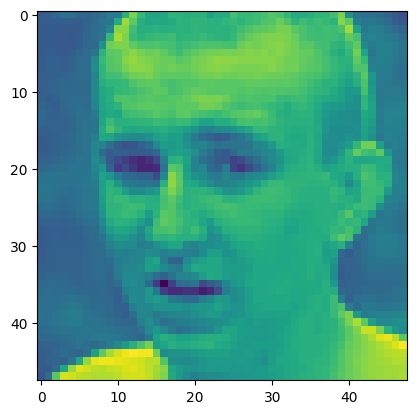

In [ ]:
final_model = tf.keras.models.load_model(checkpoint_path)
from IPython.display import clear_output
import time
for k in range(40):
  print (f'actual label is {label_to_text[y_test[k]]}')
  predicted_class = final_model.predict(tf.expand_dims (X_test[k], 0)).argmax()
  print (f'predicted label is {label_to_text [predicted_class]}')
  pyplot.imshow(X_test[k].reshape((48,48)))
  pyplot.show()
  time.sleep(5)
  clear_output (wait=True)